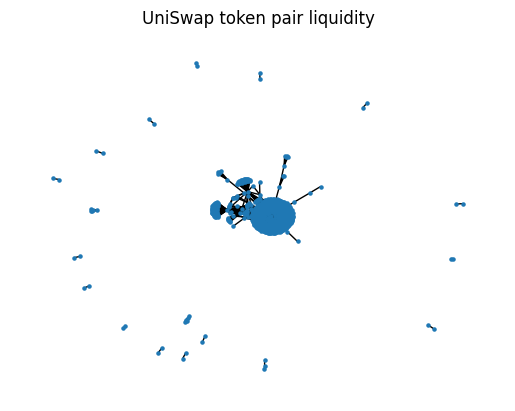

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cpnet as cpnet
import numpy as np
import random
import heapq


# df = pd.read_csv('top_1000_by_liquidity.csv')
# df_cropped = df[['token0.symbol', 'token1.symbol','reserveUSD']]
# G = nx.from_pandas_edgelist(df_cropped, source='token0.symbol', target='token1.symbol', edge_attr='reserveUSD', create_using=nx.Graph().to_undirected())

# G.number_of_nodes()
# nx.draw_spring(G, with_labels=False, node_size=5, width=1)
def build_graph():
    df = pd.read_csv('top_1000_by_liquidity.csv')
    df_cropped = df[['token0.symbol', 'token1.symbol', 'reserveUSD']]
    G = nx.from_pandas_edgelist(df, source='token0.symbol', target='token1.symbol', edge_attr='reserveUSD',
                                create_using=nx.Graph().to_undirected())
    return G


def draw_graph(G):
    plt.title("UniSwap token pair liquidity")
    nx.draw_spring(G, with_labels=False, node_size=5, width=1)
    #plt.close()


G = build_graph()
draw_graph(G)

In [3]:
def operate_on_graph(g):
  g_dac = nx.degree_assortativity_coefficient(g)

  g_aspl = nx.average_shortest_path_length(g)
  g_dia = nx.diameter(g)
  g_clustering = nx.average_clustering(g)
  return g_dac, g_aspl, g_dia, g_clustering


In [4]:
def plot_avg_nearest_neighbors_degree(g):
  knn_k = nx.average_degree_connectivity(g)
  plt.figure(figsize=(15,7))
  plt.grid(True, which = 'both', ls="-")
  plt.scatter(knn_k.keys(),knn_k.values(),alpha=0.5)
  plt.xlabel("degree k")
  plt.ylabel("degree $K_{nn}(k)$")
  plt.title(g)
  plt.xscale("log")
  plt.yscale("log")
  plt.show()

In [5]:
def plot_degree_distribution(g):
  degrees = [g.degree(n) for n in g.nodes()]
  sum_of_edges = g.number_of_edges()
  no_of_nodes = g.number_of_nodes()
  avg_degree = sum_of_edges/no_of_nodes
  my_bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees) +1), 30 )
  plt.figure(figsize=(15,7))
  plt.hist(degrees, bins = my_bins, density = 'True', ec = 'b')
  plt.axvline(x=avg_degree, color = 'r', label='Avg_Degree')
  plt.legend()
  plt.xlabel("degree")
  plt.ylabel("frequency")
  plt.title(g)
  plt.xscale("log")
  plt.yscale("log")
  plt.show()

In [6]:
def core_periphery_detection(g):
  alg = cpnet.BE()
  alg.detect(g)
  x = alg.get_coreness()
  c = alg.get_pair_id()
  print(x,c)
  fig = plt.figure(figsize=(8,6))
  ax = plt.gca()
  ax, pos = cpnet.draw(g,c,x,ax)

/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/utils.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  sparse.csr_matrix(nx.adjacency_matrix(net), dtype=np.float64),


{'UETH': 0, 'ULCK': 0, 'WISE': 0, 'WETH': 1, 'USDC': 1, 'DAI': 0, 'USDT': 0, 'DELTA': 0, 'FNK': 0, 'RK:ETH': 0, 'ROOT': 0, 'MC': 0, 'UNI': 0, 'PAXG': 0, 'ETH2POS': 0, 'DC': 0, 'FEI': 0, 'TRIBE': 0, 'FXS': 0, 'FRAX': 0, 'DBL': 0, 'BLUE': 0, 'ELON': 0, 'HANU': 0, 'GOJ': 0, 'MIA': 0, 'XXi': 0, 'vUSD': 0, 'VOW': 0, 'CAW': 0, 'WBTC': 0, 'MT': 0, 'ACR': 0, 'BigSB': 0, 'ASTO': 0, 'M2': 0, 'wPE': 0, 'WAXE': 0, 'SUPER': 0, 'BTT': 0, 'UFO': 0, 'DAPE': 0, 'ULS': 0, 'TERA': 0, 'FOX': 0, 'eXRD': 0, 'FLX': 0, 'HIGH': 0, 'SHINJA': 0, 'RAD': 0, 'STARL': 0, 'ERN': 0, 'DG': 0, 'CULT': 0, 'WOO': 0, 'VOLT': 0, 'BOND': 0, 'SAITAMA': 0, 'O': 0, 'PNK': 0, 'ShibDoge': 0, 'HEZ': 0, 'DFI': 0, 'WILD': 0, 'RAI': 0, 'X2Y2': 0, 'AMPL': 0, 'DOGE': 0, 'FLOKI': 0, 'LINK': 0, 'UNIX': 0, 'SAND': 0, 'LON': 0, 'WDOGE': 0, 'QOM': 0, 'PAX': 0, 'SWFL': 0, 'RLY': 0, '⚗️': 0, 'POLS': 0, 'XFI': 0, 'XFIT': 0, 'AUDIO': 0, 'MMAI': 0, 'GLM': 0, 'BHNY': 0, 'INU': 0, 'DEXT': 0, 'ALPHA': 0, 'WCI': 0, 'BREED': 0, 'DETS': 0, 'BOOST': 0,

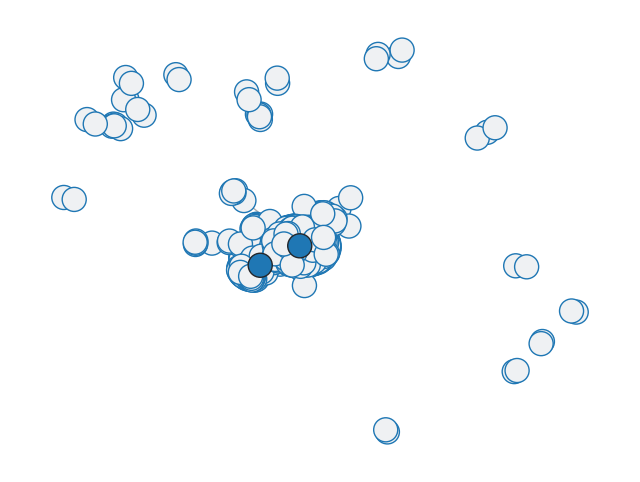

In [7]:
#g_dac, g_aspl, g_dia, g_clustering = operate_on_graph(G)
#print("The assortativity co-efficient of the network is :", g_dac)
core_periphery_detection(G)

/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/utils.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  sparse.csr_matrix(nx.adjacency_matrix(net), dtype=np.float64),


{'UETH': 0.3332566709185326, 'ULCK': 0.0799606934739978, 'WISE': 0.0819391327474434, 'WETH': 0.858550635601007, 'USDC': 0.20581622264287153, 'DAI': 0.17877226128932522, 'USDT': 0.3561478967801879, 'DELTA': 0.12113990385057652, 'FNK': 0.037200117825951264, 'RK:ETH': 0.5937673594778212, 'ROOT': 0.19175762033561908, 'MC': 0.11759755804588928, 'UNI': 0.39569651783148446, 'PAXG': 0.290770870520612, 'ETH2POS': 0.0013806927513988188, 'DC': 0.330382991913221, 'FEI': 0.014753829704254437, 'TRIBE': 0.1411468002852408, 'FXS': 0.49695946910560534, 'FRAX': -0.013210938881153753, 'DBL': 0.5712988410903529, 'BLUE': 0.1893101429229754, 'ELON': -0.004867633377954731, 'HANU': -0.014813784905802235, 'GOJ': 0.12607977693442501, 'MIA': 0.01900024350608386, 'XXi': 0.25564110011374674, 'vUSD': 0.6064153802246652, 'VOW': 0.02163249675289726, 'CAW': 0.15835549004022292, 'WBTC': 0.3619178536648679, 'MT': 0.4411192188156073, 'ACR': 0.017040496444358847, 'BigSB': 0.3116385002637156, 'ASTO': -0.0023424111816787267

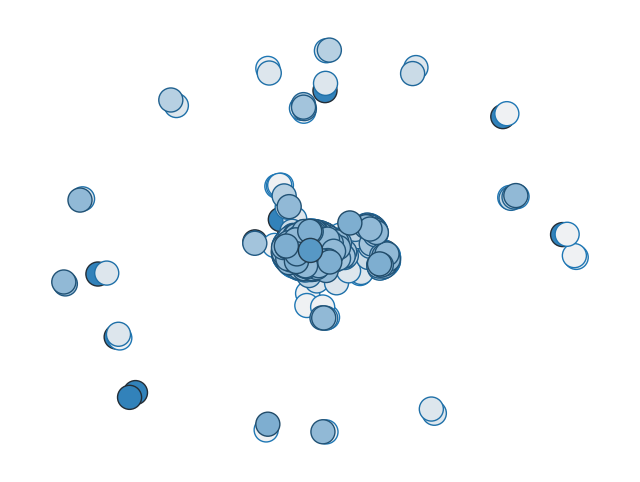

In [8]:
alg = cpnet.MINRES()
alg.detect(G)
x = alg.get_coreness()
c = alg.get_pair_id()
print(x)
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

{'UETH': 0, 'ULCK': 0, 'WISE': 1, 'WETH': 1, 'USDC': 2, 'DAI': 3, 'USDT': 4, 'DELTA': 1, 'FNK': 4, 'RK:ETH': 5, 'ROOT': 5, 'MC': 1, 'UNI': 1, 'PAXG': 16, 'ETH2POS': 6, 'DC': 6, 'FEI': 7, 'TRIBE': 7, 'FXS': 8, 'FRAX': 8, 'DBL': 9, 'BLUE': 9, 'ELON': 1, 'HANU': 10, 'GOJ': 10, 'MIA': 10, 'XXi': 1, 'vUSD': 11, 'VOW': 11, 'CAW': 1, 'WBTC': 12, 'MT': 13, 'ACR': 13, 'BigSB': 4, 'ASTO': 2, 'M2': 14, 'wPE': 14, 'WAXE': 1, 'SUPER': 1, 'BTT': 1, 'UFO': 1, 'DAPE': 0, 'ULS': 0, 'TERA': 1, 'FOX': 1, 'eXRD': 2, 'FLX': 2, 'HIGH': 1, 'SHINJA': 1, 'RAD': 2, 'STARL': 1, 'ERN': 1, 'DG': 2, 'CULT': 1, 'WOO': 2, 'VOLT': 1, 'BOND': 2, 'SAITAMA': 1, 'O': 3, 'PNK': 1, 'ShibDoge': 1, 'HEZ': 3, 'DFI': 4, 'WILD': 1, 'RAI': 1, 'X2Y2': 1, 'AMPL': 18, 'DOGE': 4, 'FLOKI': 1, 'LINK': 1, 'UNIX': 2, 'SAND': 15, 'LON': 1, 'WDOGE': 1, 'QOM': 1, 'PAX': 16, 'SWFL': 1, 'RLY': 1, '⚗️': 1, 'POLS': 1, 'XFI': 1, 'XFIT': 4, 'AUDIO': 1, 'MMAI': 1, 'GLM': 3, 'BHNY': 14, 'INU': 3, 'DEXT': 1, 'ALPHA': 1, 'WCI': 1, 'BREED': 1, 'DETS':

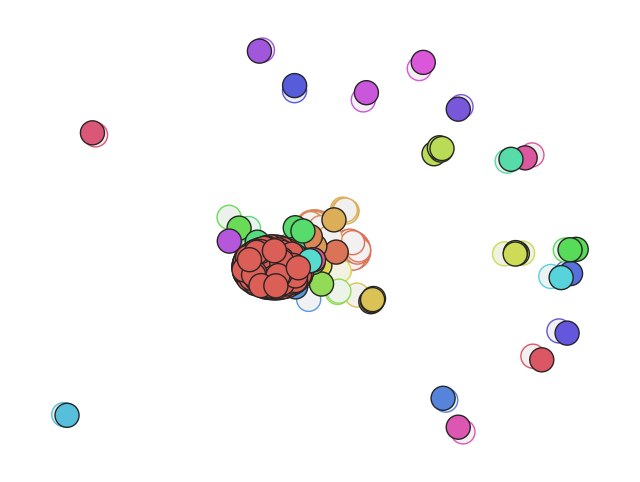

In [9]:
kmconfig = cpnet.KM_config()
kmconfig.detect(G)
c = kmconfig.get_pair_id()
x = kmconfig.get_coreness()
print(c)
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, _ = cpnet.draw(G, c, x, ax)

/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/qstest.py:96: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
  0%|          | 0/100 [00:00<?, ?it/s]/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/qstest.py:35: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  Ar = sparse.csr_matrix(nx.adjacency_matrix(Gr))
100%|██████████| 100/100 [00:16<00:00,  6.05it/s]
/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/qstest.py:146: RuntimeWarning: overflow encountered in

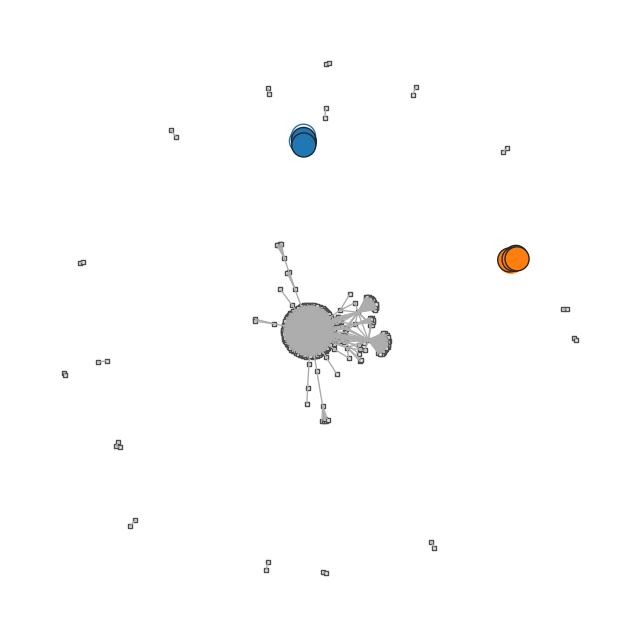

In [10]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.01, num_of_thread=1
)
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, sig_c, sig_x, ax, pos=pos)